In [6]:
from scipy.io import loadmat, savemat
from scipy.linalg import orth
import numpy as np
# import faiss
from scipy.spatial.distance import cdist
# import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
# import gc
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'lib')))

from randn2 import randn2 
import peer_functions as peer
from dot_product import CPUDotProduct, LoihiDotProductSimulationPositive, CPUDotProductPositive
from dot_product import ScaleQuery, ScaleDatabase

import math
from tqdm import tqdm
os.environ['OPENBLAS_NUM_THREADS'] = '1'

c:\Users\21361535\AppData\Local\anaconda3\envs\lava-0.10\lib\site-packages\lava\utils\profiler.py:16: UserWarning: Loihi2HWProfiler could not be imported. Currently no profiler is available.
  warnings.warn("Loihi2HWProfiler could not be imported. "


In [7]:
def calculate_evaluation_metrics(similarity_matrix, ground_truth):
    """
    Calculate evaluation metrics for place recognition results
    
    Args:
        similarity_matrix: Matrix of similarity scores between queries and database
        ground_truth: Ground truth data containing GThard and GTsoft
        
    Returns:
        dict: Dictionary containing recalls, precision, recall curves and AUC
    """
    # Get candidate selections
    ids_pos = peer.directCandSel(similarity_matrix)
    
    # Calculate recall values
    recalls = peer.getRecallAtKVector(ids_pos, ground_truth["GT"])
    
    # Calculate precision-recall curves and AUC
    [R, P] = peer.createPR(-similarity_matrix, 
                          ground_truth['GT']["GThard"][0][0], 
                          ground_truth['GT']["GTsoft"][0][0])
    auc = np.trapz(P, R)
    
    return {
        'recalls': recalls,
        'precision': P,
        'recall': R,
        'auc': auc
    }


In [8]:
D1    = loadmat("../datasets/descriptors/GardensPointWalking/day_left/delf_hdc_4096_ortho_sigma_nx5ny7.mat")['Y']
D2    = loadmat("../datasets/descriptors/GardensPointWalking/night_right/delf_hdc_4096_ortho_sigma_nx5ny7.mat")['Y']

g_truth = loadmat("../datasets/ground_truth/GardensPointWalking/day_left--night_right/gt.mat")

In [9]:
from dot_product import  LoihiDotProductSimulationPositive, LoihiDotProductSimulationPositive3Layer, LoihiDotProductSimulationPositive3LayerRateEncoded


In [5]:
constant = 1/math.sqrt(2)

# dot = LoihiDotProductSimulationPositive3Layer(D1[:3], D2[:3], constant)
dot = LoihiDotProductSimulationPositive3Layer(D1, D2, constant)

In [6]:
DD = dot.run()
# profiles = dot.run()


queryVector :
[[ 3.20424385e+01 -2.67378731e+01 -7.14074898e+00 ... -1.18967628e+01 -1.23577681e+01  4.94655609e+00]
 [ 1.31225948e+01 -3.31136971e+01 -4.13061142e+00 ... -7.99704552e+00  1.77128201e+01  2.77971687e+01]
 [ 1.30678701e+01  5.47965813e+00 -3.16248131e+00 ... -6.26458073e+00  1.97425671e+01  2.72892570e+01]
 ...
 [-1.11907969e+01 -4.61805916e+00 -2.47623444e+00 ... -7.80654573e+00  1.16653309e+01  1.35694609e+01]
 [-3.55572701e-02  8.82355022e+00  2.09126873e+01 ...  3.83732843e+00 -5.09438181e+00 -5.97783566e-01]
 [ 3.67699623e+01 -1.54764814e+01 -2.47188663e+01 ...  1.08136344e+00 -1.39409857e+01  3.38288002e+01]]
mean_center_norm_positive :
[[0.73617085 0.6864167  0.7013947  ... 0.70841606 0.69891691 0.71213312]
 [0.72115633 0.6825258  0.70382522 ... 0.71123092 0.72132333 0.72872839]
 [0.72109533 0.71087414 0.70454031 ... 0.71249572 0.72279124 0.7283237 ]
 ...
 [0.70338048 0.70354412 0.70508771 ... 0.71127378 0.71665779 0.7180212 ]
 [0.71134108 0.71312584 0.72171307 ..

100%|██████████| 200/200 [01:43<00:00,  1.93it/s]


In [7]:
DD.shape

(200, 200)

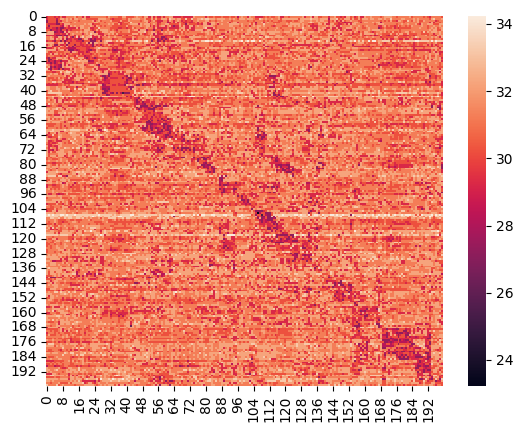

In [8]:
import seaborn as sns

ax = sns.heatmap(DD)
plt.show()

In [11]:

metrics = calculate_evaluation_metrics(DD, g_truth)
print(f"AUC: {metrics['auc']}")

AUC: 0.08692389955300922


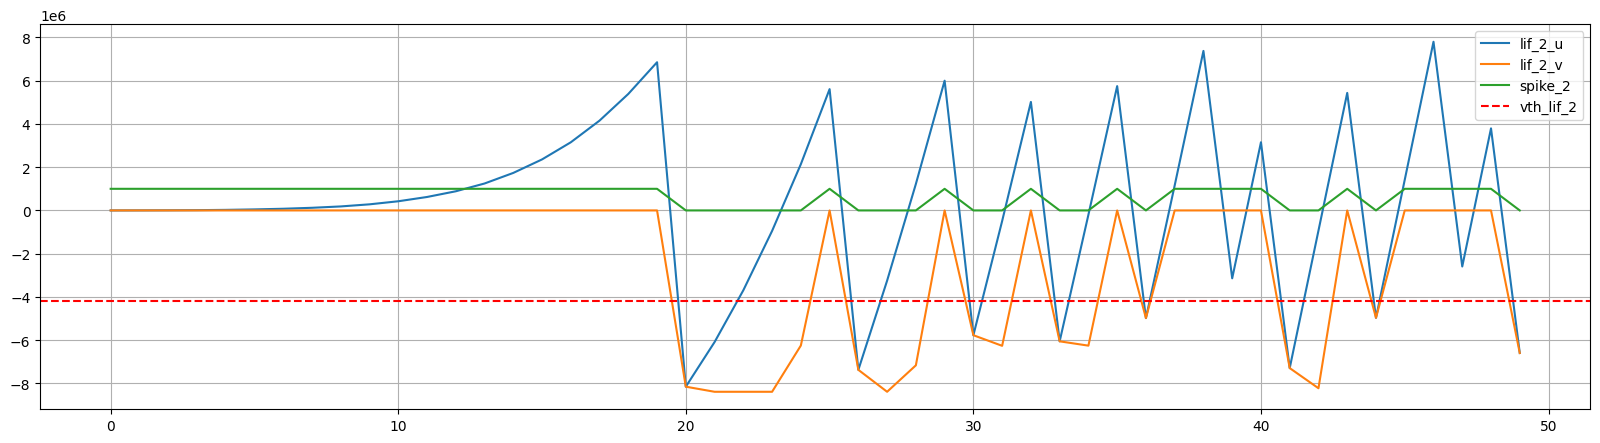

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(profiles[1][:,0], label='lif_2_u')
plt.plot(profiles[2][:,0], label='lif_2_v')
plt.plot(profiles[-1][:,0] * (10**6), label='spike_2')
plt.axhline(y=-(2**16 - 1)*2**6, color='r', linestyle='--', label='vth_lif_2')  # Changed to horizontal line
plt.grid(True)


plt.legend()
plt.show()


### 3 Layer Rate Encoded


In [10]:
from dot_product import  LoihiDotProductSimulationPositive3LayerRateEncoded

constant = 1/math.sqrt(2)

dot = LoihiDotProductSimulationPositive3LayerRateEncoded(D1[:3], D2[:3], constant)
# dot = LoihiDotProductSimulationPositive3LayerRateEncoded(D1, D2, constant)


In [11]:
# DD = dot.run()
profiles = dot.run()


queryVector :
[[ 32.04243851 -26.73787308  -7.14074898 ... -11.89676285 -12.35776806   4.94655609]
 [ 13.12259483 -33.11369705  -4.13061142 ...  -7.99704552  17.71282005  27.79716873]
 [ 13.06787014   5.47965813  -3.16248131 ...  -6.26458073  19.74256706  27.28925705]]
mean_center_norm_positive :
[[0.71075009 0.70329047 0.70084488 ... 0.70363905 0.68787847 0.70395171]
 [0.69876573 0.69930244 0.70280857 ... 0.70613649 0.7070608  0.71841344]
 [0.69887537 0.72338877 0.70348342 ... 0.70722841 0.7083213  0.71790355]]
rslt :
[[0.01569865 0.01553388 0.01547987 ... 0.01554158 0.01519347 0.01554849]
 [0.01543395 0.01544581 0.01552325 ... 0.01559675 0.01561717 0.01586792]
 [0.01543661 0.01597806 0.01553839 ... 0.01562111 0.01564525 0.0158569 ]]
max_q0 :
0.016846195618909057
min_q0 :
0.014425858942993289
transform_dbVectors :
[[22.34734731 29.27221308 25.49277558 ... 16.55905546 27.42821189 21.18051165]
 [31.20398445 40.43700868 19.17380634 ... 25.66343083 26.57302336 18.48720788]
 [20.64640854  

AttributeError: 'GradedDense' object has no attribute 's_in'

In [7]:
profiles[1]

array([[      0.,       0.,       0.],
       [      0.,       0.,       0.],
       [      0.,       0.,   36928.],
       [      0.,       0.,  177974.],
       [      0.,       0.,  267146.],
       [      0.,       0.,  287048.],
       [      0.,       0.,  471105.],
       [      0.,       0.,  472333.],
       [      0.,       0.,  562521.],
       [      0.,       0.,  704911.],
       [      0.,       0.,  762466.],
       [      0.,       0.,  762535.],
       [      0.,       0.,  998764.],
       [      0.,       0.,  998776.],
       [      0.,       0., 1036804.],
       [      0.,       0., 1197574.],
       [      0.,       0., 1287585.],
       [      0.,       0., 1287590.],
       [      0.,       0., 1472875.],
       [      0.,       0., 1472515.],
       [      0.,       0., 1582171.],
       [      0.,       0., 1724184.],
       [      0.,       0., 1760947.],
       [      0.,       0., 1760517.],
       [      0.,       0., 1997591.],
       [      0.,       0

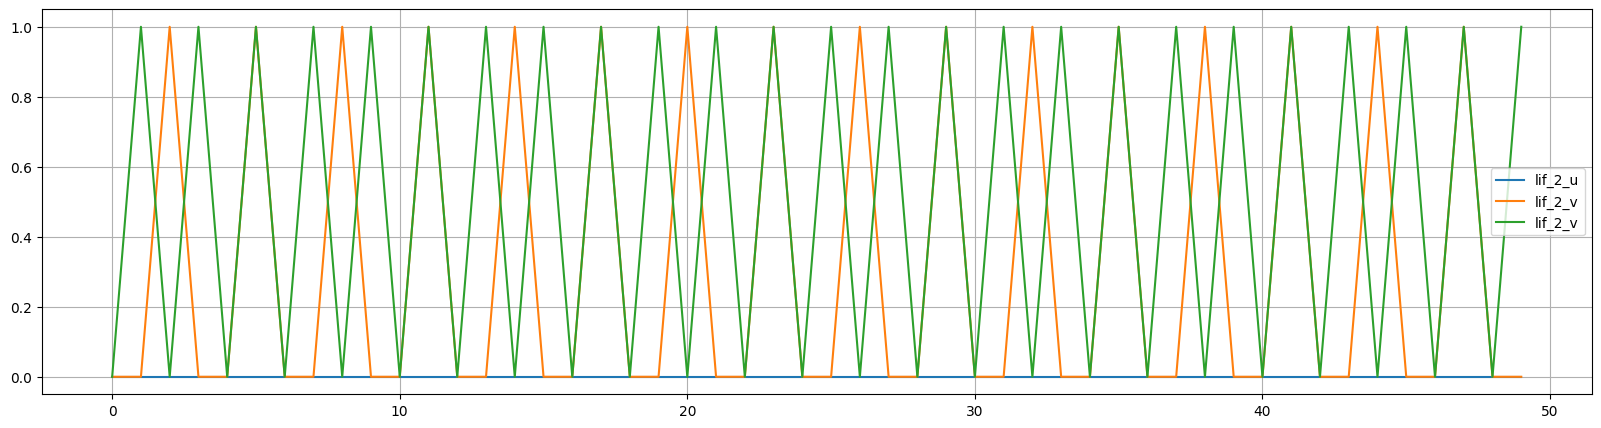

In [10]:
plt.figure(figsize=(20, 5))
neuron_id = 3
plt.plot(profiles[4][:,0], label='lif_2_u')
plt.plot(profiles[4][:,1], label='lif_2_v')
plt.plot(profiles[4][:,2], label='lif_2_v')
# plt.plot(profiles[4][:,neuron_id] * (10**6), label='spike_2')
# plt.axhline(y=-(2**16 - 1)*2**6, color='r', linestyle='--', label='vth_lif_2')  # Changed to horizontal line
plt.grid(True)


plt.legend()
plt.show()


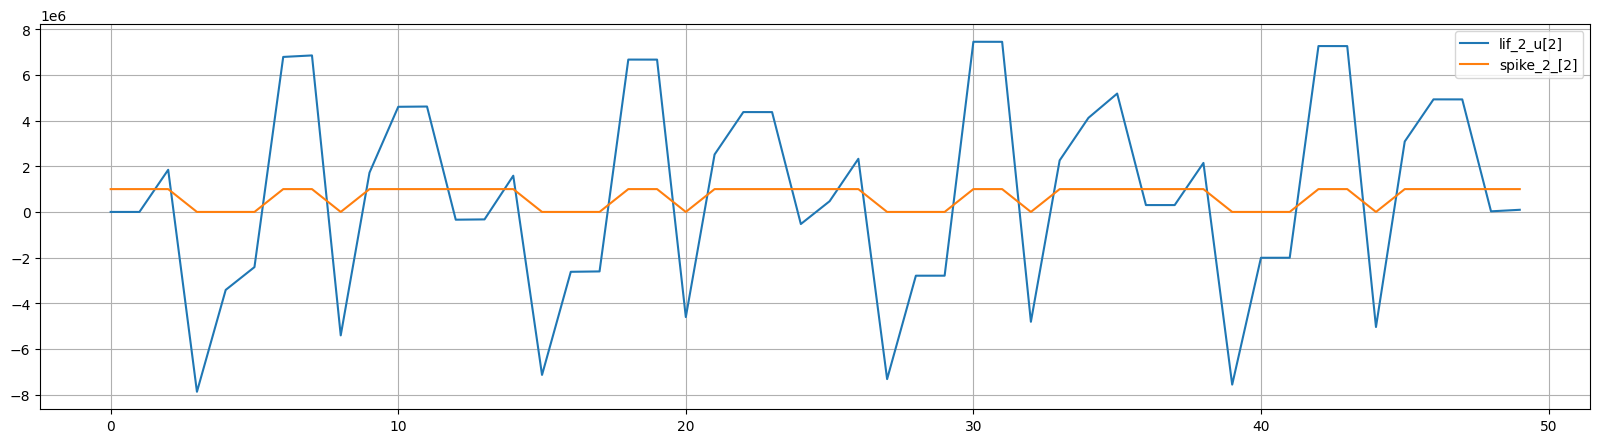

In [19]:
plt.figure(figsize=(20, 5))
neuron_id = 0
# plt.plot(profiles[1][:,0], label='lif_2_u[0]')
# plt.plot(profiles[1][:,1], label='lif_2_u[1]')
plt.plot(profiles[1][:,2], label='lif_2_u[2]')

# plt.plot(profiles[-1][:,0] * (10**6), label='spike_2_[0]')
# plt.plot(profiles[-1][:,1] * (10**6), label='spike_2_[1]')
plt.plot(profiles[-1][:,2] * (10**6), label='spike_2_[2]')

# plt.axhline(y=-(2**16 - 1)*2**6, color='r', linestyle='--', label='vth_lif_2')  # Changed to horizontal line
plt.grid(True)


plt.legend()
plt.show()


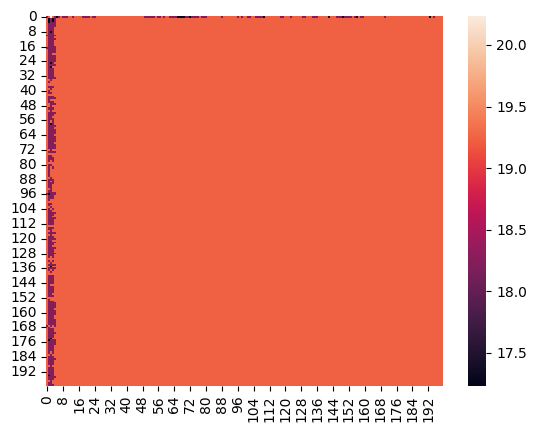

In [7]:
import seaborn as sns

ax = sns.heatmap(DD)
plt.show()